In [ ]:
install.packages("tidyverse")
install.packages("tsibble")
install.packages("fable")
install.packages("fabletools")
install.packages("feasts")
install.packages("lubridate")
install.packages("scales")
install.packages("fpp3")
install.packages("gridExtra")
install.packages("tsibble")
install.packages("urca")
install.packages("zoo")


suppressMessages(library(tidyverse))
suppressMessages(library(tsibble))
suppressMessages(library(fable))
suppressMessages(library(tsibble))
suppressMessages(library(fabletools))
suppressMessages(library(feasts))
suppressMessages(library(lubridate))
suppressMessages(library(scales))
suppressMessages(library(fpp3))
suppressMessages(library(gridExtra))
suppressMessages(library(urca))
suppressMessages(library(zoo))



data <- read.csv('monthly_housing_inventory.csv')
data |> head(10)




data <-  data %>%
mutate(county = str_extract(county_name, '^(.*)?, ([a-z]{2})$', group=1)) %>%
mutate(state = str_extract(county_name, '^(.*)?, ([a-z]{2})$', group=2)) %>%
mutate(month_date = tsibble::yearmonth(as.character(month_date_yyyymm), '%Y%m'))

data %>% head()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,month_date_yyyymm,county_name,median_listing_price,active_listing_count,new_listing_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,202403,"hartley, tx",425000,12,0,1,289,3024,444336,12
2,202403,"rock, mn",309900,21,8,13,136,2016,397205,35
3,202403,"carter, ok",199000,165,56,59,127,1633,306719,222
4,202403,"mckean, pa",169000,48,12,25,89,1898,187270,71
5,202403,"etowah, al",248950,236,128,67,124,1894,296370,303
6,202403,"dawson, ga",679450,135,76,80,227,2802,814852,211
7,202403,"middlesex, ct",559900,194,152,219,250,2098,700510,418
8,202403,"garfield, co",1272500,148,68,92,503,2536,1904972,240
9,202403,"jefferson, ny",235000,187,96,152,141,1697,358984,330


,month_date_yyyymm,county_name,median_listing_price,active_listing_count,new_listing_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,county,state,month_date
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<mth>
1,202403,"hartley, tx",425000,12,0,1,289,3024,444336,12,hartley,tx,2024 Mar
2,202403,"rock, mn",309900,21,8,13,136,2016,397205,35,rock,mn,2024 Mar
3,202403,"carter, ok",199000,165,56,59,127,1633,306719,222,carter,ok,2024 Mar
4,202403,"mckean, pa",169000,48,12,25,89,1898,187270,71,mckean,pa,2024 Mar
5,202403,"etowah, al",248950,236,128,67,124,1894,296370,303,etowah,al,2024 Mar
6,202403,"dawson, ga",679450,135,76,80,227,2802,814852,211,dawson,ga,2024 Mar


In [ ]:
# If doing option 3 you may want to filter the data ahead of time to reduce the processing
df_five_states <- data %>% filter(state %in% c('md', 'va', 'pa', 'de', 'nj'))
df_five_states %>% dim()

df_five_states_ts <- df_five_states %>% as_tsibble(index=month_date, key=c(state, county))


df_five_states_ts <- df_five_states_ts %>%
fill_gaps()

df_five_states_ts %>% head()

df_five_states_ts %>% dim()

df_five_states_ts_filled <- df_five_states_ts |>
  model(ARIMA(active_listing_count ~ pdq(0:1, 0:1, 0:1) + PDQ(0,0,0))) |>
  fabletools::interpolate(df_five_states_ts)

df_five_states_ts_filled %>% head()

df_five_states_ts_filled %>% filter(is.na(active_listing_count))

[1] 22674    13

month_date_yyyymm,county_name,median_listing_price,active_listing_count,new_listing_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,county,state,month_date
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<mth>
201607,"kent, de",240000,1203,332,412,119,1916,248196,1596,kent,de,2016 Jul
201608,"kent, de",238925,1202,282,389,118,1911,244720,1588,kent,de,2016 Aug
201609,"kent, de",239000,1192,362,278,119,1898,245363,1461,kent,de,2016 Sep
201610,"kent, de",239700,1184,272,410,119,1909,247105,1603,kent,de,2016 Oct
201611,"kent, de",238600,1160,274,382,119,1909,245420,1544,kent,de,2016 Nov
201612,"kent, de",235780,1099,184,346,118,1897,241322,1443,kent,de,2016 Dec


[1] 22802    13

state,county,month_date,active_listing_count
<chr>,<chr>,<mth>,<dbl>
de,kent,2016 Jul,1203
de,kent,2016 Aug,1202
de,kent,2016 Sep,1192
de,kent,2016 Oct,1184
de,kent,2016 Nov,1160
de,kent,2016 Dec,1099


state,county,month_date,active_listing_count
<chr>,<chr>,<mth>,<dbl>


In [ ]:
df_fab5_ts <- df_five_states_ts_filled %>%
fabletools::aggregate_key(
    state / county,
    total_listing=sum(active_listing_count)
)

df_fab5_ts %>% dim()

[1] 23360     4

In [ ]:
df_fab5_ts %>% head()

month_date,state,county,total_listing
<mth>,<chr*>,<chr*>,<dbl>
2016 Jul,<aggregated>,<aggregated>,196832
2016 Aug,<aggregated>,<aggregated>,193834
2016 Sep,<aggregated>,<aggregated>,190681
2016 Oct,<aggregated>,<aggregated>,186352
2016 Nov,<aggregated>,<aggregated>,175776
2016 Dec,<aggregated>,<aggregated>,159476


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `state != "<aggregated>"`.
Caused by warning:
! <aggregated> character values have been converted to aggregated values.
Hint: If you're trying to compare aggregated values, use `is_aggregated()`.”


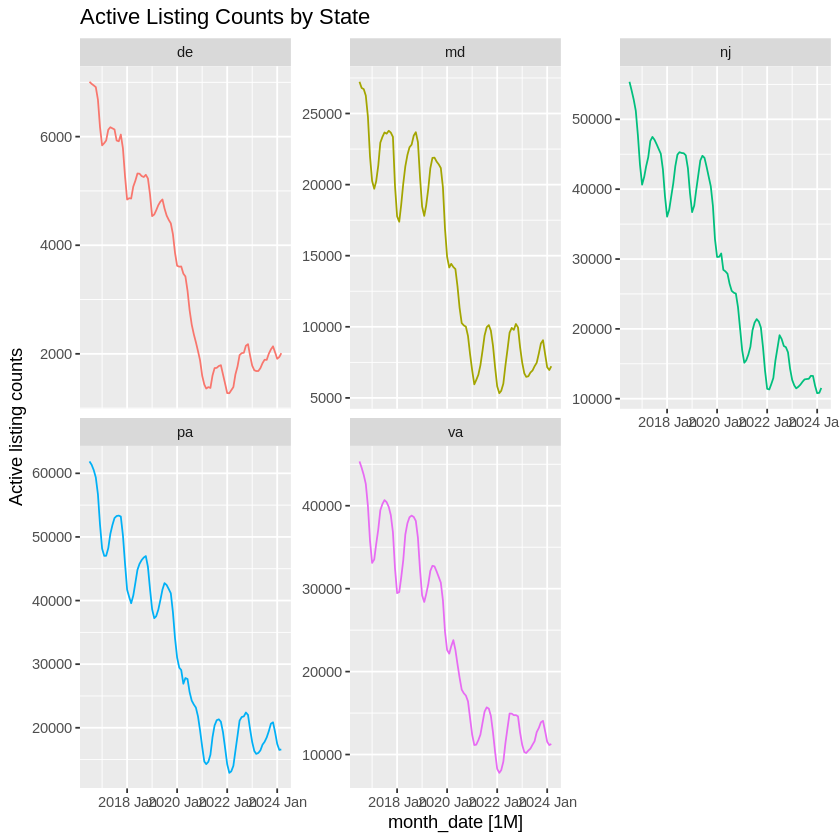

In [ ]:
df_fab5_ts |>
  filter(state != "<aggregated>") |>
  filter(is_aggregated(county)) |>
  autoplot(total_listing) +
  labs(y = "Active listing counts",
       title = "Active Listing Counts by State") +
  facet_wrap(vars(state), scales = "free_y", ncol = 3) +
  theme(legend.position = "none")


In [ ]:
# Filter out only state data
state_data <- df_fab5_ts %>%
  filter(state != "<aggregated>")

# Display the filtered state data
head(state_data)


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `state != "<aggregated>"`.
Caused by warning:
! <aggregated> character values have been converted to aggregated values.
Hint: If you're trying to compare aggregated values, use `is_aggregated()`.”


month_date,state,county,total_listing
<mth>,<chr*>,<chr*>,<dbl>
2016 Jul,de,<aggregated>,7010
2016 Jul,md,<aggregated>,27232
2016 Jul,nj,<aggregated>,55374
2016 Jul,pa,<aggregated>,61872
2016 Jul,va,<aggregated>,45344
2016 Aug,de,<aggregated>,6972


In [ ]:
# Ensure data is a tsibble
state_data <- as_tsibble(state_data, index = month_date)

# Split data: training and testing
split_date <- as.Date("2022-12-01")
training_set <- state_data %>% filter(month_date <= split_date)
testing_set <- state_data %>% filter(month_date > split_date)

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date <= split_date`.
Caused by warning:
! Incompatible methods ("<=.vctrs_vctr", "<=.Date") for "<="”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date > split_date`.
Caused by warning:
! Incompatible methods (">.vctrs_vctr", ">.Date") for ">"”


In [ ]:
state_data %>% dim()

[1] 23267     4

In [ ]:
#fcasts_state <- df_fab5_ts |>
  #filter(!is_aggregated(state)) |>
  #model(ets = ETS(total_listing)) |>
  #forecast()

In [ ]:
# Fit models
#models <- training_set %>%
  #model(
    #ARIMA = ARIMA(total_listing),
    #ETS = ETS(total_listing),
    #NAIVE = NAIVE(total_listing)
 # )

In [ ]:
#models |> accuracy() |> select(.model, RMSE, MAPE)

##Individual forecasts for counties

In [ ]:
library(dplyr)

md_data <- state_data %>%
  filter(state == "md")
va_data <- state_data %>%
  filter(state == "va")
pa_data <- state_data %>%
  filter(state == "pa")
de_data <- state_data %>%
  filter(state == "de")
nj_data <- state_data %>%
  filter(state == "nj")

###For MD

In [ ]:
# Split data: training and testing
split_date <- as.Date("2022-12-01")
training_set_md <- md_data %>% filter(month_date <= split_date)
testing_set_md <- md_data %>% filter(month_date > split_date)

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date <= split_date`.
Caused by warning:
! Incompatible methods ("<=.vctrs_vctr", "<=.Date") for "<="”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date > split_date`.
Caused by warning:
! Incompatible methods (">.vctrs_vctr", ">.Date") for ">"”


In [ ]:
head(md_data)

month_date,state,county,total_listing
<mth>,<chr*>,<chr*>,<dbl>
2016 Jul,md,allegany,474
2016 Aug,md,allegany,489
2016 Sep,md,allegany,484
2016 Oct,md,allegany,483
2016 Nov,md,allegany,462
2016 Dec,md,allegany,443


In [ ]:
df_fab5_ts <- df_five_states_ts_filled %>%
fabletools::aggregate_key(
    state / county,
    total_listing=sum(active_listing_count)
)

df_fab5_ts %>% dim()

In [ ]:
# Fit models
models_md <- training_set_md %>%
  model(
    ARIMA = ARIMA(total_listing),
    ETS = ETS(total_listing),
    NAIVE = NAIVE(total_listing)
  )

In [ ]:
models_md |> accuracy() |> select(.model, RMSE, MAPE)

.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,12.098130,4.159720
ETS,15.279354,4.770297
NAIVE,16.477848,5.394818
ARIMA,70.085471,4.278639
ETS,68.502132,4.688125
NAIVE,131.339058,8.070137
ARIMA,65.683675,4.082939
ETS,70.551727,4.566332
NAIVE,144.863976,7.912495


In [ ]:
md_fcst <- models_md |>
forecast(testing_set_md)

md_fcst |> accuracy(testing_set_md) |> select(.model, RMSE, MAPE)

.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,14.549750,10.273487
ARIMA,117.809092,17.688251
ARIMA,251.812451,23.248560
ARIMA,253.812809,13.697801
ARIMA,31.562588,22.494988
ARIMA,21.699155,28.968064
ARIMA,65.800271,40.052821
ARIMA,111.547177,68.571602
ARIMA,94.728856,25.558744


In [ ]:
library(dplyr)

# Filter out rows where county is "<aggregated>"
md_data <- md_data %>%
  filter(county != "<aggregated>")

# Now md_data does not contain the aggregated rows


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `county != "<aggregated>"`.
Caused by warning:
! <aggregated> character values have been converted to aggregated values.
Hint: If you're trying to compare aggregated values, use `is_aggregated()`.”


<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

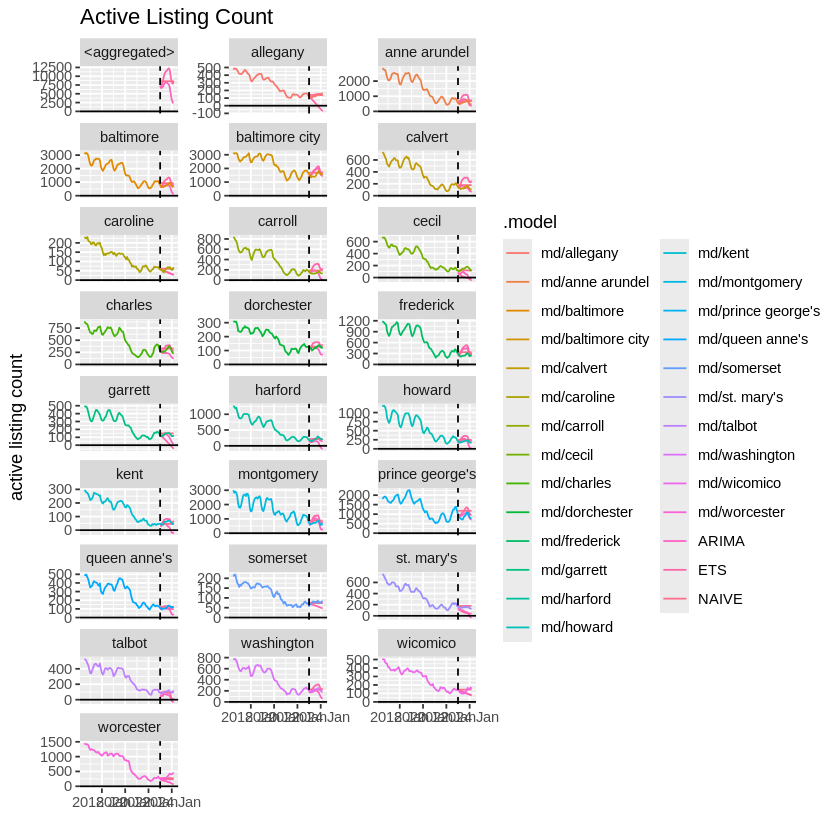

In [ ]:
md_fcst |> autoplot(level=NULL) +
autolayer(md_data, total_listing) +
labs(title='Active Listing Count', x='', y='active listing count') +
geom_vline(xintercept = as.Date('2023-01-01'), linetype='dashed') +
geom_hline(yintercept = 0) +
facet_wrap(vars(county), scales = "free_y", ncol = 3)
scale_y_continuous(labels=scales::percent)

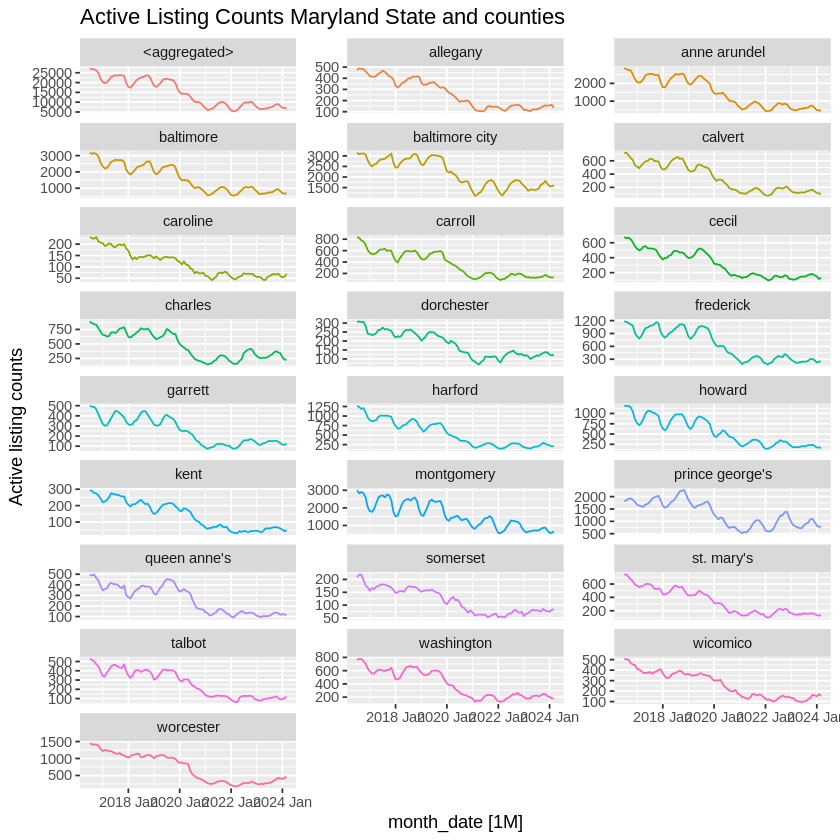

In [ ]:
md_data |>
  autoplot(total_listing) +
  labs(y = "Active listing counts",
       title = "Active Listing Counts Maryland State and counties") +
  facet_wrap(vars(county), scales = "free_y", ncol = 3) +
  theme(legend.position = "none")

ARIMA performs the best, so we will using it to forecast further

In [ ]:
md_fnl_arima <- md_data |>
model(
    'ARIMA' = ARIMA(total_listing)
)

md_fnl_arima %>% report()

In [ ]:
print(md_fnl_arima)

# A mable: 24 x 3
# Key:     state, county [24]
   state  county                                      ARIMA
   <chr*> <chr*>                                    <model>
 1 md     allegany                <ARIMA(0,1,1)(1,0,0)[12]>
 2 md     anne arundel   <ARIMA(2,0,0)(0,1,1)[12] w/ drift>
 3 md     baltimore      <ARIMA(2,0,0)(0,1,1)[12] w/ drift>
 4 md     baltimore city          <ARIMA(2,0,0)(0,1,1)[12]>
 5 md     calvert        <ARIMA(2,0,0)(0,1,1)[12] w/ drift>
 6 md     caroline                  <ARIMA(0,1,0) w/ drift>
 7 md     carroll        <ARIMA(2,0,0)(0,1,1)[12] w/ drift>
 8 md     cecil          <ARIMA(2,0,2)(0,1,1)[12] w/ drift>
 9 md     charles                 <ARIMA(2,0,0)(2,1,0)[12]>
10 md     dorchester                         <ARIMA(1,1,0)>
# ℹ 14 more rows


In [ ]:
md_fnl_arima <-as_tsibble(md_fnl_arima, index=state)

ERROR: [1m[33mError[39m in `validate_index()`:[22m
[33m![39m Unsupported index type: agg_vec


In [ ]:
md_fnl_arima |> autoplot(level=NULL) +
autolayer(md_data, total_listing) +
labs(title='Active Listing Count', x='', y='active listing count') +
geom_hline(yintercept = 0) +
facet_wrap(vars(county), scales = "free_y", ncol = 3)
scale_y_continuous(labels=scales::percent)

ERROR: [1m[33mError[39m in `autoplot()`:[22m
[1m[22m[33m![39m Objects of class [34m<mdl_df>[39m are not supported by autoplot.
[36mℹ[39m Have you loaded the required package?


###For VA

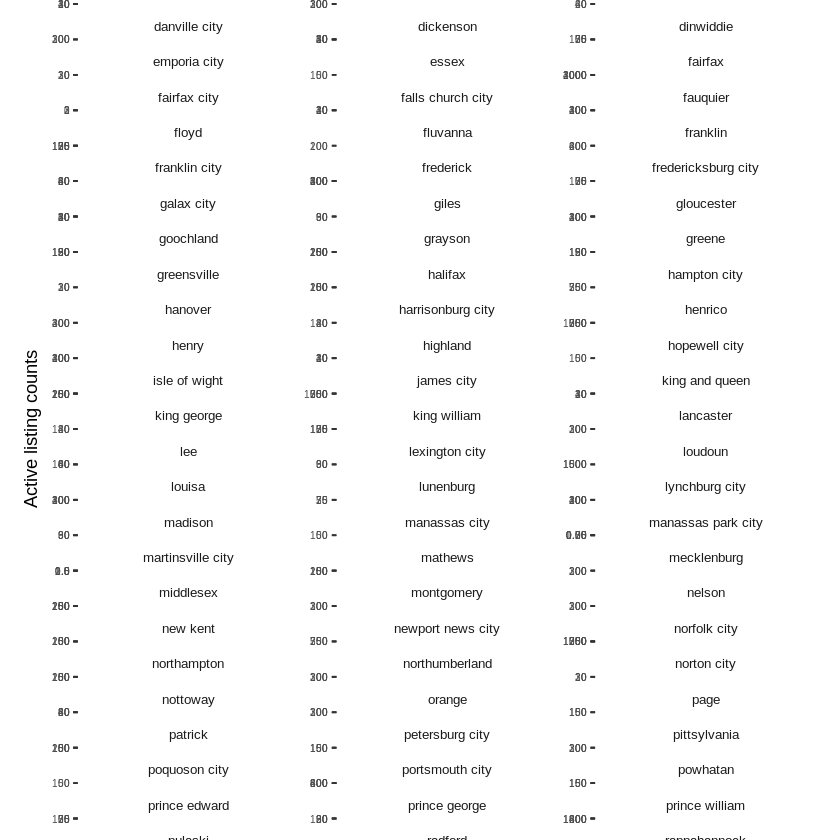

In [ ]:
va_data |>
  autoplot(total_listing) +
  labs(y = "Active listing counts",
       title = "Active Listing Counts Maryland State and counties") +
  facet_wrap(vars(county), scales = "free_y", ncol = 15) +
  theme(legend.position = "none")


In [ ]:
# Split data: training and testing
split_date <- as.Date("2022-12-01")
training_set_va <- va_data %>% filter(month_date <= split_date)
testing_set_va <- va_data %>% filter(month_date > split_date)

# Fit models
models_va <- training_set_va %>%
  model(
    ARIMA = ARIMA(total_listing),
    ETS = ETS(total_listing),
    NAIVE = NAIVE(total_listing)
  )

models_va |> accuracy() |> select(.model, RMSE, MAPE)

va_fcst <- models_va |>
forecast(testing_set_va)

va_fcst |> accuracy(testing_set_va) |> select(.model, RMSE, MAPE)

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date <= split_date`.
Caused by warning:
! Incompatible methods ("<=.vctrs_vctr", "<=.Date") for "<="”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date > split_date`.
Caused by warning:
! Incompatible methods (">.vctrs_vctr", ">.Date") for ">"”


.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,9.761865,2.863222
ETS,13.103507,3.737871
NAIVE,16.379033,4.693486
ARIMA,22.385934,4.757522
ETS,26.007380,5.396292
NAIVE,48.085017,8.046949
ARIMA,21.598438,6.705455
ETS,22.721889,7.264286
NAIVE,40.558439,11.692363


.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,61.229705,31.030601
ARIMA,22.387291,7.894222
ARIMA,126.671150,91.166550
ARIMA,17.344257,62.846291
ARIMA,8.413555,57.868114
ARIMA,11.224262,22.260043
ARIMA,7.167979,24.123182
ARIMA,97.050270,32.119590
ARIMA,17.172777,16.836873


ERROR while rich displaying an object: Error in `$<-.data.frame`(`*tmp*`, "SCALE_Y", value = 1:134): replacement has 134 rows, data has 135

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `county != "<aggregated>"`.
Caused by warning:
! <aggregated> character values have been converted to aggregated values.
Hint: If you're trying to compare aggregated values, use `is_aggregated()`.”


<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

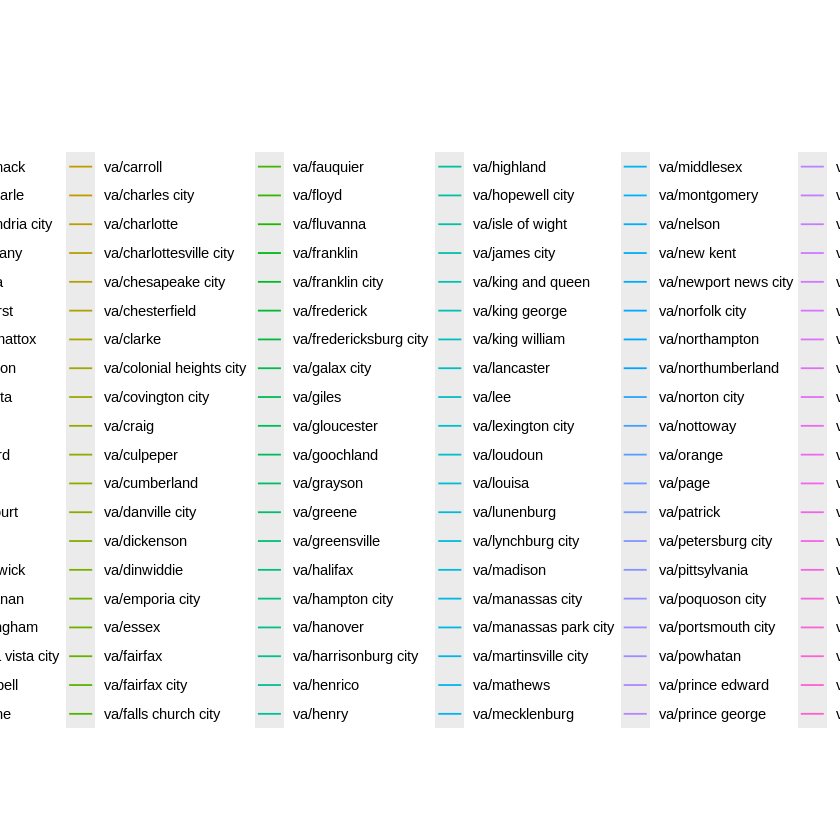

In [ ]:
library(dplyr)

# Filter out rows where county is "<aggregated>"
va_data <- va_data %>%
  filter(county != "<aggregated>")

va_fcst |> autoplot(level=NULL) +
autolayer(va_data, total_listing) +
labs(title='Active Listing Count', x='', y='Percent (%)') +
geom_vline(xintercept = as.Date('2023-01-01'), linetype='dashed') +
geom_hline(yintercept = 0) +
facet_wrap(vars(county), scales = "free_y", ncol = 10)
scale_y_continuous(labels=scales::percent)

###For DE

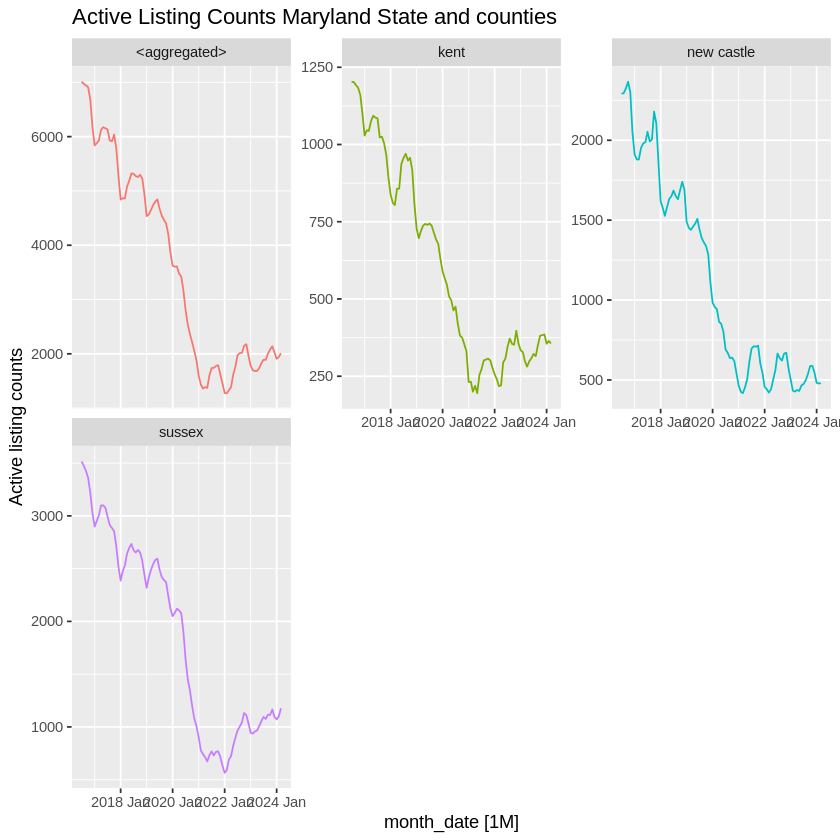

In [ ]:
de_data |>
  autoplot(total_listing) +
  labs(y = "Active listing counts",
       title = "Active Listing Counts Maryland State and counties") +
  facet_wrap(vars(county), scales = "free_y", ncol = 3) +
  theme(legend.position = "none")

In [ ]:
# Split data: training and testing
split_date <- as.Date("2022-12-01")
training_set_de <- de_data %>% filter(month_date <= split_date)
testing_set_de <- de_data %>% filter(month_date > split_date)

# Fit models
models_de <- training_set_de %>%
  model(
    ARIMA = ARIMA(total_listing),
    ETS = ETS(total_listing),
    NAIVE = NAIVE(total_listing)
  )

models_de |> accuracy() |> select(.model, RMSE, MAPE)

de_fcst <- models_de |>
forecast(testing_set_de)

de_fcst |> accuracy(testing_set_de) |> select(.model, RMSE, MAPE)

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date <= split_date`.
Caused by warning:
! Incompatible methods ("<=.vctrs_vctr", "<=.Date") for "<="”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date > split_date`.
Caused by warning:
! Incompatible methods (">.vctrs_vctr", ">.Date") for ">"”


.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,24.82502,4.301235
ETS,25.19358,4.502144
NAIVE,36.51383,5.714804
ARIMA,52.47027,4.335967
ETS,50.17799,4.107123
NAIVE,80.35861,5.810959
ARIMA,51.96535,2.993714
ETS,65.00195,3.193240
NAIVE,89.86122,4.878908


.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,108.57540,20.789806
ARIMA,238.51414,38.172101
ARIMA,63.09558,4.276748
ARIMA,209.75813,8.440094
ETS,76.40861,20.083717
ETS,72.27208,13.052753
ETS,282.89304,22.783192
ETS,415.83459,20.205593
NAIVE,37.35595,9.636499


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `county != "<aggregated>"`.
Caused by warning:
! <aggregated> character values have been converted to aggregated values.
Hint: If you're trying to compare aggregated values, use `is_aggregated()`.”


<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

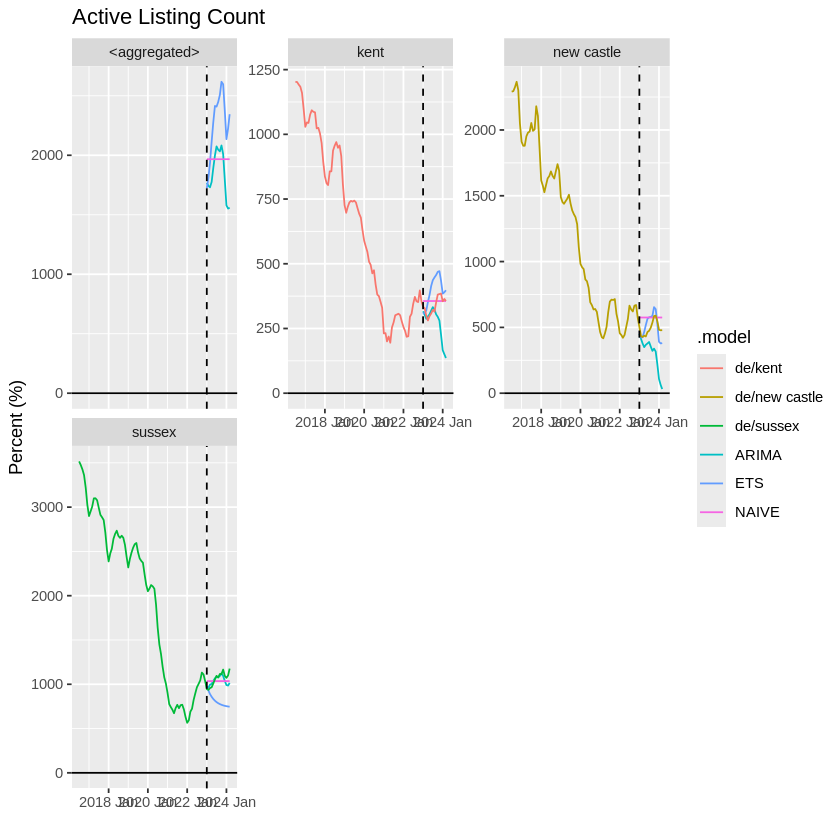

In [ ]:
# Filter out rows where county is "<aggregated>"
de_data <- de_data %>%
  filter(county != "<aggregated>")

de_fcst |> autoplot(level=NULL) +
autolayer(de_data, total_listing) +
labs(title='Active Listing Count', x='', y='Percent (%)') +
geom_vline(xintercept = as.Date('2023-01-01'), linetype='dashed') +
geom_hline(yintercept = 0) +
facet_wrap(vars(county), scales = "free_y", ncol = 3)
scale_y_continuous(labels=scales::percent)

###For NJ

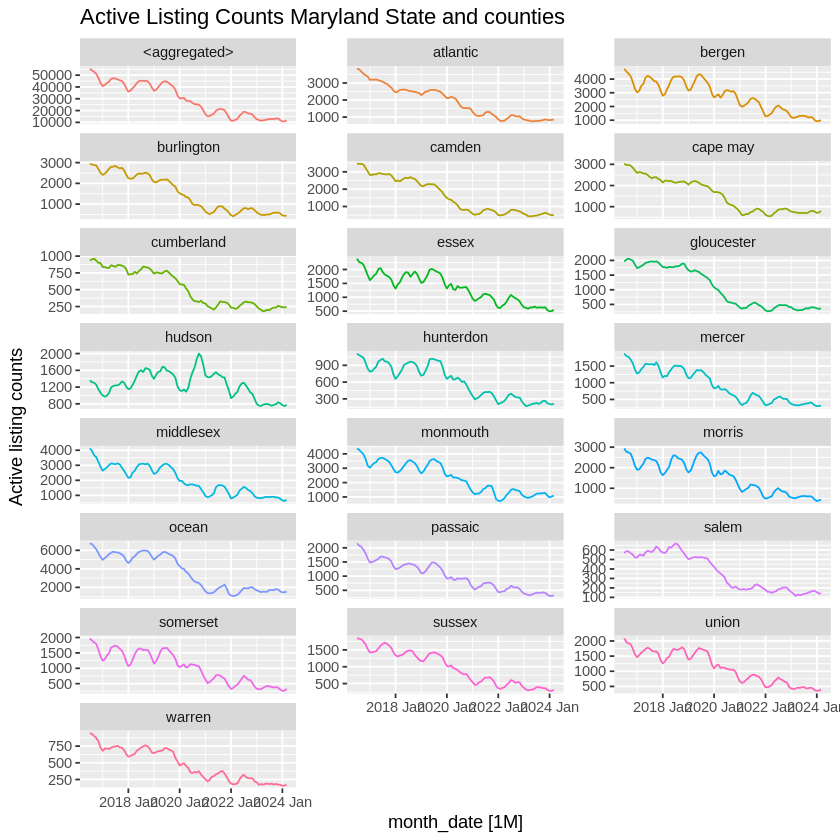

In [ ]:
nj_data |>
  autoplot(total_listing) +
  labs(y = "Active listing counts",
       title = "Active Listing Counts Maryland State and counties") +
  facet_wrap(vars(county), scales = "free_y", ncol = 3) +
  theme(legend.position = "none")

In [ ]:
# Split data: training and testing
split_date <- as.Date("2022-12-01")
training_set_nj <- nj_data %>% filter(month_date <= split_date)
testing_set_nj <- nj_data %>% filter(month_date > split_date)

# Fit models
models_nj <- training_set_nj %>%
  model(
    ARIMA = ARIMA(total_listing),
    ETS = ETS(total_listing),
    NAIVE = NAIVE(total_listing)
  )

models_va |> accuracy() |> select(.model, RMSE, MAPE)

nj_fcst <- models_nj |>
forecast(testing_set_nj)

nj_fcst |> accuracy(testing_set_nj) |> select(.model, RMSE, MAPE)

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date <= split_date`.
Caused by warning:
! Incompatible methods ("<=.vctrs_vctr", "<=.Date") for "<="”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date > split_date`.
Caused by warning:
! Incompatible methods (">.vctrs_vctr", ">.Date") for ">"”


.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,9.761865,2.863222
ETS,13.103507,3.737871
NAIVE,16.379033,4.693486
ARIMA,22.385934,4.757522
ETS,26.007380,5.396292
NAIVE,48.085017,8.046949
ARIMA,21.598438,6.705455
ETS,22.721889,7.264286
NAIVE,40.558439,11.692363


.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,203.46042,20.023298
ARIMA,438.72973,28.162689
ARIMA,174.43354,30.970121
ARIMA,249.05154,42.544643
ARIMA,76.52787,8.861764
ARIMA,53.97137,22.086636
ARIMA,138.86031,20.160387
ARIMA,48.18154,10.999215
ARIMA,193.57292,19.452633


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `county != "<aggregated>"`.
Caused by warning:
! <aggregated> character values have been converted to aggregated values.
Hint: If you're trying to compare aggregated values, use `is_aggregated()`.”


<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

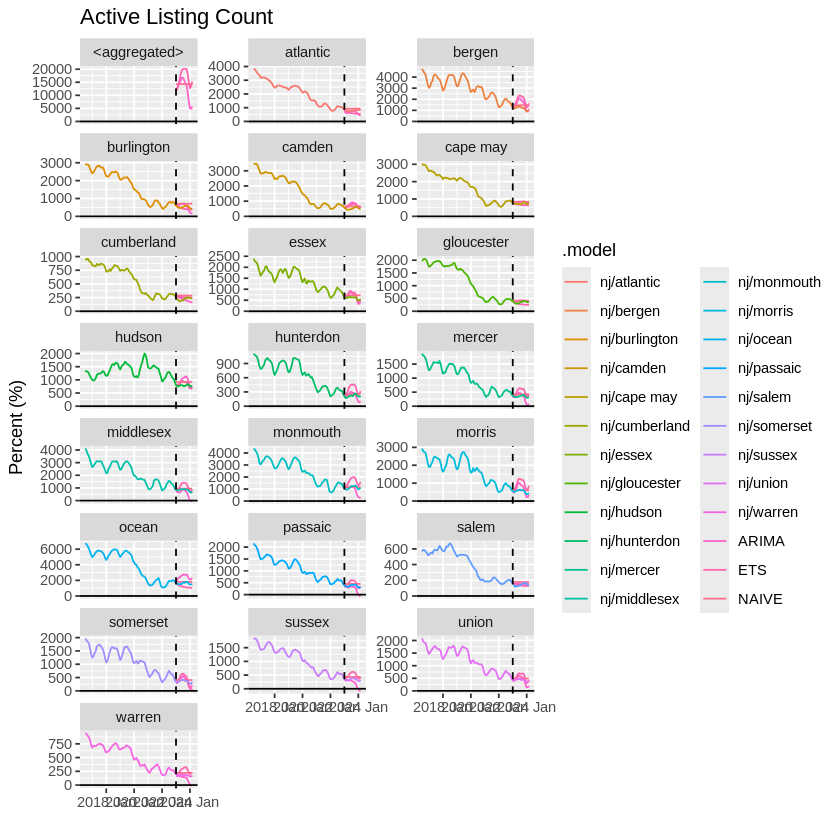

In [ ]:
# Filter out rows where county is "<aggregated>"
nj_data <- nj_data %>%
  filter(county != "<aggregated>")

nj_fcst |> autoplot(level=NULL) +
autolayer(nj_data, total_listing) +
labs(title='Active Listing Count', x='', y='Percent (%)') +
geom_vline(xintercept = as.Date('2023-01-01'), linetype='dashed') +
geom_hline(yintercept = 0) +
facet_wrap(vars(county), scales = "free_y", ncol = 3)
scale_y_continuous(labels=scales::percent)

###For PA

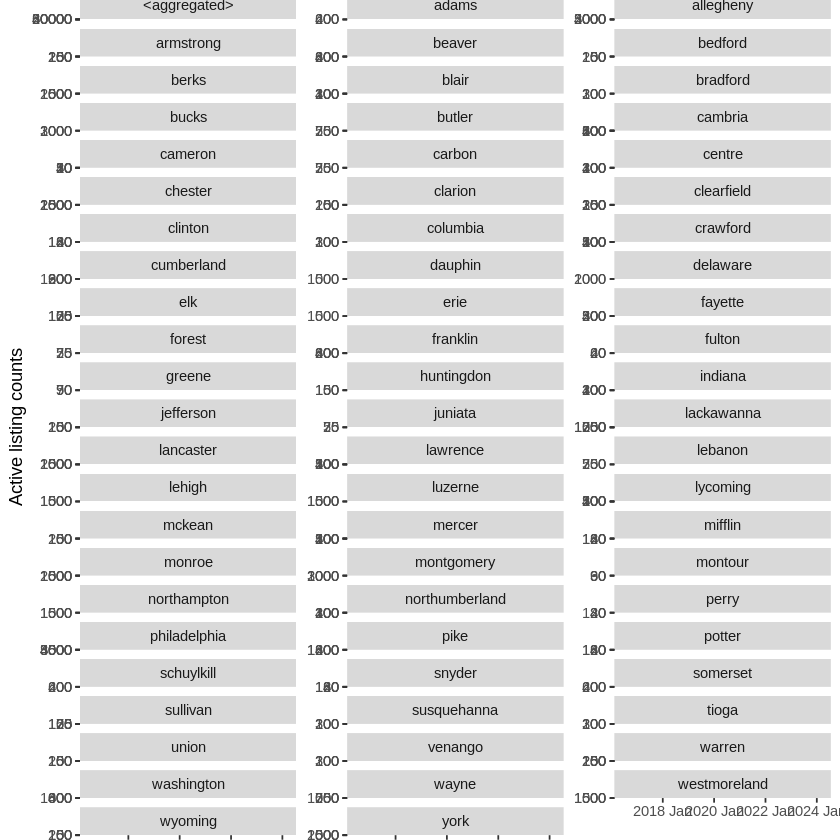

In [ ]:
pa_data |>
  autoplot(total_listing) +
  labs(y = "Active listing counts",
       title = "Active Listing Counts Maryland State and counties") +
  facet_wrap(vars(county), scales = "free_y", ncol = 3) +
  theme(legend.position = "none")

In [ ]:
# Split data: training and testing
split_date <- as.Date("2022-12-01")
training_set_pa <- pa_data %>% filter(month_date <= split_date)
testing_set_pa <- pa_data %>% filter(month_date > split_date)

# Fit models
models_pa <- training_set_pa %>%
  model(
    ARIMA = ARIMA(total_listing),
    ETS = ETS(total_listing),
    NAIVE = NAIVE(total_listing)
  )

models_pa |> accuracy() |> select(.model, RMSE, MAPE)

pa_fcst <- models_pa |>
forecast(testing_set_pa)

pa_fcst |> accuracy(testing_set_pa) |> select(.model, RMSE, MAPE)

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date <= split_date`.
Caused by warning:
! Incompatible methods ("<=.vctrs_vctr", "<=.Date") for "<="”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `month_date > split_date`.
Caused by warning:
! Incompatible methods (">.vctrs_vctr", ">.Date") for ">"”
Warning message in sqrt(diag(best$var.coef)):
“NaNs produced”
Warning message in sqrt(diag(best$var.coef)):
“NaNs produced”


.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,14.804163,5.088860
ETS,18.069180,5.773019
NAIVE,20.423122,6.063642
ARIMA,69.737607,2.042891
ETS,65.880178,1.837260
NAIVE,186.636044,5.841726
ARIMA,7.471620,4.882440
ETS,7.030625,4.398289
NAIVE,10.067306,6.219607


.model,RMSE,MAPE
<chr>,<dbl>,<dbl>
ARIMA,58.291925,32.258907
ARIMA,212.291817,8.955525
ARIMA,39.209201,40.685804
ARIMA,46.638382,11.662730
ARIMA,22.952543,27.028280
ARIMA,144.193506,37.033044
ARIMA,26.815641,14.221381
ARIMA,23.859858,25.702194
ARIMA,174.122625,28.896221


In [ ]:
# Filter out rows where county is "<aggregated>"
pa_data <- pa_data %>%
  filter(county != "<aggregated>")

pa_fcst |> autoplot(level=NULL) +
autolayer(va_data, total_listing) +
labs(title='Active Listing Count', x='', y='Percent (%)') +
geom_vline(xintercept = as.Date('2023-01-01'), linetype='dashed') +
geom_hline(yintercept = 0) +
facet_wrap(vars(county), scales = "free_y", ncol = 3)
scale_y_continuous(labels=scales::percent)

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `county != "<aggregated>"`.
Caused by warning:
! <aggregated> character values have been converted to aggregated values.
Hint: If you're trying to compare aggregated values, use `is_aggregated()`.”
ERROR while rich displaying an object: Error in `$<-.data.frame`(`*tmp*`, "SCALE_Y", value = 1:189): replacement has 189 rows, data has 190

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .       

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1